In [33]:
%load_ext rpy2.ipython
import codecs
import pandas as pd
import numpy as np
import torchviz
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from torch.utils.tensorboard import SummaryWriter
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import joblib
from sklearn.preprocessing import MinMaxScaler
import time
import warnings
warnings.simplefilter('ignore')
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# load data

In [34]:
tag = pd.read_csv('C:/Users/bigje/Desktop/AI中心/yo-jupyter/R11程式/tag_cleaned.csv',index_col=0).dropna(axis=0)
tag_map = dict(zip(tag.TAG,tag.chinese))
tag[tag.category=='可控制因子']

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,145,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,64,85.4,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****
5,6.0,MLPAP_PIC-0741.PV,汽鼓(V211)鍋爐水壓力,壓力,KG/CM2,可控制因子,1分鐘2筆,28,45,*
6,7.0,MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,液位,%,可控制因子,1分鐘2筆,20,60,*
7,8.0,MLPAP_PIC-0761.PV,鹽浴冷卻器(E212)出口壓力,壓力,BAR,可控制因子,1分鐘2筆,40,55,***
9,10.0,MLPAP_LRC-0729.PV,鍋爐水液位控制,液位,%,可控制因子,1分鐘2筆,20,60,*
10,11.0,MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,溫度,℃,可控制因子,1分鐘2筆,55,68,****


In [35]:
#此變數少一個R，改為TJR
tag = tag.replace('MLPAP_TJ-0881.PV','MLPAP_TJR-0881.PV')
tag[tag.category=='可控制因子']

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,145,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,64,85.4,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****
5,6.0,MLPAP_PIC-0741.PV,汽鼓(V211)鍋爐水壓力,壓力,KG/CM2,可控制因子,1分鐘2筆,28,45,*
6,7.0,MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,液位,%,可控制因子,1分鐘2筆,20,60,*
7,8.0,MLPAP_PIC-0761.PV,鹽浴冷卻器(E212)出口壓力,壓力,BAR,可控制因子,1分鐘2筆,40,55,***
9,10.0,MLPAP_LRC-0729.PV,鍋爐水液位控制,液位,%,可控制因子,1分鐘2筆,20,60,*
10,11.0,MLPAP_TJC-1721.PV,轉換式冷凝器冷油溫度,溫度,℃,可控制因子,1分鐘2筆,55,68,****


In [36]:
tag[tag.chinese.str.contains('環境溫度')]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
92,93.0,MLPAP_TJ3-1110.PV,環境溫度,溫度,℃,不可控制因子,1分鐘2筆,20,40,***


# 將ETL中的train_cleaned.csv匯入

In [37]:
df = pd.read_csv('C:/Users/bigje/Desktop/AI中心/yo-jupyter/R11程式/train_cleaned.csv',index_col=0,parse_dates=True)
print(df.shape)
df.sample(5)

(195408, 97)


,MLPAP_TJ-0706B02,MLPAP_TJ-0706B03,MLPAP_TJ-0706B04,MLPAP_TJ-0706B05,MLPAP_TJ-0706B06,MLPAP_TJ-0706B07,MLPAP_TJ-0706B08,MLPAP_TJ-0706B09,MLPAP_TJ-0706B10,MLPAP_TJ-0706B11,...,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TJC-0757.PV,MLPAP_V225-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-0747.PV,MLPAP_TJR-0881.PV,MLPAP_TJ3-1110.PV,MLPAP_FQI-0997.SMH,MLPAP_FR-0755.PV(轉換後)
2019-11-27 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.502476,NaN,NaN,0.003,0.000000,127.900002,155.000000,20.900000,NaN,NaN
2016-11-26 08:00:00,377.437149,396.000000,401.852463,408.00000,403.750168,404.000000,405.0,406.554276,399.000000,389.000000,...,NaN,420.888474,1.396178,0.028,113.134533,172.162636,138.600006,23.615593,NaN,NaN
2017-12-16 13:40:00,380.000000,396.933624,400.000000,404.98085,399.685089,399.149963,397.0,399.000000,399.000000,395.000000,...,NaN,455.338333,-0.142507,0.022,175.258270,172.100006,139.100006,NaN,NaN,NaN
2019-11-17 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.916119,NaN,NaN,0.014,9.411644,134.261497,134.800003,22.600000,NaN,NaN
2017-09-30 22:40:00,378.725128,396.000000,400.000000,406.00000,401.000000,401.629639,400.0,403.256195,403.806076,399.088608,...,NaN,NaN,0.635919,0.037,154.515984,172.000000,138.800003,30.751052,NaN,NaN


# 將在R語言上處理完成觸媒耗用程度檔案匯入

In [38]:
df1 = pd.read_csv('C:/Users/bigje/Desktop/AI中心/yo-jupyter/R11程式/train_cleaned(R1).csv',index_col=0,parse_dates=True)
print(df1.shape)
df1.sample(5)

(192096, 97)


,MLPAP_TJ.0706B02,MLPAP_TJ.0706B03,MLPAP_TJ.0706B04,MLPAP_TJ.0706B05,MLPAP_TJ.0706B06,MLPAP_TJ.0706B07,MLPAP_TJ.0706B08,MLPAP_TJ.0706B09,MLPAP_TJ.0706B10,MLPAP_TJ.0706B11,...,MLPAP_FI.V211.PV.轉換後.,MLPAP_PI.0658.PV,MLPAP_TJC.0757.PV,MLPAP_V225.PHD,MLPAP_PI.0771.PV,MLPAP_TRC.0747.PV,MLPAP_TJR.0881.PV,MLPAP_TJ3.1110.PV,MLPAP_FQI.0997.SMH,MLPAP_FR.0755.PV.轉換後.
ts,,,,,,,,,,,,,,,,,,,,,
2016-11-23 06:40:00,377.138687,395.949921,401.752914,408.011292,404.000000,404.238739,405.000000,406.927811,399.0,389.0,...,NaN,416.419525,1.261779,0.030,108.389164,172.195740,138.500000,20.400000,NaN,NaN
2017-05-19 23:40:00,377.245392,394.000000,397.992355,402.173874,396.188522,395.595352,393.827286,395.000000,392.0,385.0,...,NaN,408.676743,2.468240,0.029,112.585041,174.384048,139.300003,NaN,NaN,NaN
2019-11-13 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,0.014,NaN,NaN,38.210962,23.500000,NaN,NaN
2019-10-11 08:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1438.036865,NaN,NaN,0.019,0.000000,135.000000,155.699997,23.849999,NaN,NaN
2016-12-05 08:30:00,378.000000,396.198029,402.324844,409.000000,404.000000,404.790375,405.000000,407.000000,400.0,390.0,...,NaN,421.757629,1.461898,0.026,114.549763,172.137062,138.800003,21.846105,NaN,NaN


# 直接取代原本的DATA OF USE

In [39]:
df['DATA OF USE'] = df1['DATA.OF.USE']

# 查看取代結果

In [40]:
df['DATA OF USE']

2016-05-09 00:00:00         NaN
2016-05-09 00:10:00         NaN
2016-05-09 00:20:00         NaN
2016-05-09 00:30:00         NaN
2016-05-09 00:40:00         NaN
                         ...   
2020-02-11 23:20:00    0.999953
2020-02-11 23:30:00    0.999965
2020-02-11 23:40:00    0.999977
2020-02-11 23:50:00    0.999988
2020-02-12 00:00:00    1.000000
Name: DATA OF USE, Length: 195408, dtype: float64

# 繼續往下進行preprocessing步驟

In [41]:
df.head(10)

,MLPAP_TJ-0706B02,MLPAP_TJ-0706B03,MLPAP_TJ-0706B04,MLPAP_TJ-0706B05,MLPAP_TJ-0706B06,MLPAP_TJ-0706B07,MLPAP_TJ-0706B08,MLPAP_TJ-0706B09,MLPAP_TJ-0706B10,MLPAP_TJ-0706B11,...,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TJC-0757.PV,MLPAP_V225-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-0747.PV,MLPAP_TJR-0881.PV,MLPAP_TJ3-1110.PV,MLPAP_FQI-0997.SMH,MLPAP_FR-0755.PV(轉換後)
2016-05-09 00:00:00,400.0,401.957123,400.751862,402.250793,401.148773,401.0,400.050079,403.0,402.0,401.0,...,NaN,NaN,1.635186,0.009,NaN,133.100006,156.434341,26.475903,0.0,NaN
2016-05-09 00:10:00,400.0,401.949921,400.850876,402.249969,401.074387,401.0,400.149933,403.0,402.0,401.0,...,NaN,NaN,1.630099,0.009,NaN,133.100006,156.434319,26.487951,0.0,NaN
2016-05-09 00:20:00,400.0,401.942719,400.899780,402.249146,401.000000,401.0,400.100159,403.0,402.0,401.0,...,NaN,NaN,1.635186,0.009,NaN,133.100006,156.434341,26.500000,0.0,NaN
2016-05-09 00:30:00,400.0,401.946320,400.899994,402.249969,401.000000,401.0,400.122421,403.0,402.0,401.0,...,NaN,NaN,1.635186,0.009,NaN,133.100006,156.434341,26.562115,0.0,NaN
2016-05-09 00:40:00,400.0,401.949921,400.899780,402.249146,401.000000,401.0,400.144684,403.0,402.0,401.0,...,NaN,NaN,1.635187,0.009,NaN,133.100006,156.434341,26.500000,0.0,NaN
2016-05-09 00:50:00,400.0,401.953522,400.899994,402.249969,401.000000,401.0,400.197235,403.0,402.0,401.0,...,NaN,NaN,1.642483,0.009,NaN,133.100006,156.434341,26.500000,0.0,NaN
2016-05-09 01:00:00,400.0,401.949921,400.900208,402.250793,401.000000,401.0,400.207306,403.0,402.0,401.0,...,NaN,NaN,1.635528,0.009,NaN,133.100006,156.434341,26.500000,0.0,NaN
2016-05-09 01:10:00,400.0,401.953522,400.925049,402.275558,401.025085,401.0,400.228546,403.0,402.0,401.0,...,NaN,NaN,1.635357,0.009,NaN,133.100006,156.434319,26.562115,0.0,NaN
2016-05-09 01:20:00,400.0,401.957123,400.900238,402.300323,401.000977,401.0,400.249786,403.0,402.0,401.0,...,NaN,NaN,1.635528,0.009,NaN,133.100006,156.434296,26.624229,0.0,NaN
2016-05-09 01:30:00,400.0,401.978561,400.925064,402.312241,401.025574,401.0,400.320282,403.0,402.0,401.0,...,NaN,NaN,1.642654,0.009,NaN,133.108559,156.434097,26.562115,0.0,NaN


# add total_stream

In [42]:
stream_cols = tag[tag.chinese.str.contains('蒸氣')== True].TAG.tolist()
print(stream_cols)
df['stream'] = df[stream_cols[0]]*1000 + df[stream_cols[1]]*1000
df['stream'].describe()

['MLPAP_FR-0755PV(轉換後)', 'MLPAP_FR-0791.PV', 'MLPAP_FI-V211.PV(轉換後)']


count    144146.000000
mean      43982.251089
std        5784.735339
min       12315.485477
25%       41122.830868
50%       45557.143688
75%       48073.001862
max       49620.235443
Name: stream, dtype: float64

# add new features

In [43]:
df['濃度'] = df['MLPAP_FQ-0619.PV']/df['MLPAP_FR-0632.PV']
df['濃度'].dropna().head()

2016-05-09 20:50:00    31.827281
2016-05-09 21:00:00    31.849000
2016-05-09 21:10:00    31.844829
2016-05-09 21:20:00    31.856754
2016-05-09 21:30:00    31.868678
Name: 濃度, dtype: float64

# define columns

In [44]:
action = tag[tag['category']=='可控制因子']['TAG'].values.tolist()
action = action + ['濃度']

# delete not need columns
action.remove('MLPAP_FQ-0619.PV')
action.remove('MLPAP_TJC-0757.PV')
#action.remove('MLPAP_TRC-0762.PV')#不需要
action.remove('MLPAP_PIC-0741.PV')
action.remove('MLPAP_LIC-0738.PV')
action.remove('MLPAP_LRC-0729.PV')
action.remove('MLPAP_FQI-0997.SMH')#add on 2020/10/08
action.insert(0,'MLPAP_FQ-0619.PV')
print('action:',len(action))

action: 12


In [45]:
action

['MLPAP_FQ-0619.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-1734.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TJR-0881.PV',
 'MLPAP_TJ-0757B.PV',
 '濃度']

In [46]:
output = get_col(df,'0997.PV')
print('output:',len(output))

output: 1


In [47]:
stream = ['stream']
print('stream:',len(stream))

stream: 1


In [48]:
state = get_col(df,'DATA OF USE') + ['MLPAP_TJ3-1110.PV']#環境溫度
print('state:',len(state))

state: 2


In [49]:
#other = ['MLPAP_TJR-0721.PV']

# select columns

In [50]:
state

['DATA OF USE', 'MLPAP_TJ3-1110.PV']

In [51]:
action

['MLPAP_FQ-0619.PV',
 'MLPAP_TJC-0627.PV',
 'MLPAP_TRC-0610.PV',
 'MLPAP_FR-0632.PV',
 'MLPAP_TJC-0757A.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TJC-1721.PV',
 'MLPAP_TRC-1734.PV',
 'MLPAP_TRC-0747.PV',
 'MLPAP_TJR-0881.PV',
 'MLPAP_TJ-0757B.PV',
 '濃度']

In [52]:
output

['MLPAP_FQI-0997.PV']

In [53]:
stream

['stream']

In [54]:
df = df[state + action + output + stream]
print(df.shape)

(195408, 16)


# look miss value

<AxesSubplot:>

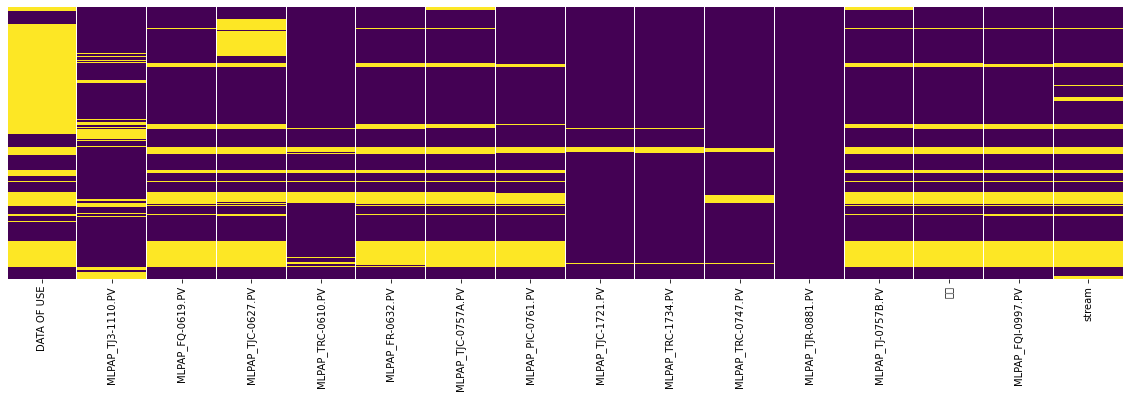

In [55]:
fig = plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
df[action]['濃度'].describe()

count    149157.000000
mean         89.402491
std           8.852223
min          31.538335
25%          89.933728
50%          91.371772
75%          93.209897
max         106.949533
Name: 濃度, dtype: float64

# scale data

In [57]:
mm_state = MinMaxScaler()
mm_action = MinMaxScaler()
mm_output = MinMaxScaler()
mm_stream = MinMaxScaler()
#mm_other = MinMaxScaler()

df[state] = mm_state.fit_transform(df[state])
df[action] = mm_action.fit_transform(df[action])
df[output] = mm_output.fit_transform(df[output])
df[stream] = mm_stream.fit_transform(df[stream])
#df[other] = mm_other.fit_transform(df[other])

df.sample(5)

,DATA OF USE,MLPAP_TJ3-1110.PV,MLPAP_FQ-0619.PV,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TJC-0757A.PV,MLPAP_PIC-0761.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TRC-0747.PV,MLPAP_TJR-0881.PV,MLPAP_TJ-0757B.PV,濃度,MLPAP_FQI-0997.PV,stream
2017-01-19 08:30:00,NaN,NaN,0.903977,0.103111,0.538739,0.607920,0.055359,0.978764,0.423897,0.443938,0.887866,0.864713,0.092922,0.841982,0.937091,0.898233
2019-02-04 03:00:00,0.540989,0.126984,0.969660,0.624195,0.578226,0.911823,0.190378,0.947627,0.377588,0.519086,0.858706,0.861596,0.198404,0.804980,0.950025,0.796205
2018-10-22 17:10:00,0.460599,0.304435,0.894913,0.520381,0.626069,0.724541,0.315278,0.947859,0.362679,0.571030,0.887993,0.864713,0.349300,0.793587,0.868338,0.896138
2019-08-05 18:00:00,NaN,0.610707,NaN,NaN,0.401333,NaN,NaN,NaN,0.383707,0.518256,0.450099,0.970075,NaN,NaN,NaN,NaN
2017-09-11 18:00:00,NaN,0.634357,0.972719,0.207104,0.662866,0.864122,0.120210,0.927545,0.387326,0.476536,0.891566,0.865960,0.138075,0.822990,0.942356,0.980546


In [58]:
df.head(10)

,DATA OF USE,MLPAP_TJ3-1110.PV,MLPAP_FQ-0619.PV,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_TJC-0757A.PV,MLPAP_PIC-0761.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TRC-0747.PV,MLPAP_TJR-0881.PV,MLPAP_TJ-0757B.PV,濃度,MLPAP_FQI-0997.PV,stream
2016-05-09 00:00:00,NaN,0.342640,NaN,NaN,NaN,NaN,NaN,0.710892,0.670751,0.569303,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 00:10:00,NaN,0.343278,NaN,NaN,NaN,NaN,NaN,0.710892,0.596246,0.568624,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 00:20:00,NaN,0.343915,NaN,NaN,NaN,NaN,NaN,0.710892,0.562696,0.567945,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 00:30:00,NaN,0.347202,NaN,NaN,NaN,NaN,NaN,0.710892,0.547446,0.529224,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 00:40:00,NaN,0.343915,NaN,NaN,NaN,NaN,NaN,0.710892,0.536234,0.567945,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 00:50:00,NaN,0.343915,NaN,NaN,NaN,NaN,NaN,0.710892,0.542062,0.568624,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 01:00:00,NaN,0.343915,NaN,NaN,NaN,NaN,NaN,0.710892,0.547890,0.569303,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 01:10:00,NaN,0.347202,NaN,NaN,NaN,NaN,NaN,0.710892,0.548733,0.568928,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 01:20:00,NaN,0.350488,NaN,NaN,NaN,NaN,NaN,0.710892,0.549576,0.568552,0.408172,0.975276,NaN,NaN,NaN,NaN
2016-05-09 01:30:00,NaN,0.347202,NaN,NaN,NaN,NaN,NaN,0.710892,0.548733,0.568248,0.408277,0.975275,NaN,NaN,NaN,NaN


In [59]:
df[action]['濃度'].describe()

count    149157.000000
mean          0.767315
std           0.117386
min           0.000000
25%           0.774360
50%           0.793429
75%           0.817804
max           1.000000
Name: 濃度, dtype: float64

# build dataset for modeling

In [60]:
def build_dataset(df,n):
    
    data = {'state':[],
            'action':[],
            'output':[],
            'stream':[],
            'idx':[],
           }
    
    for i in tqdm(range(0,len(df)-n)):
        curr = df.iloc[i:i+n] #一小段資料
        if np.isnan(curr.values).sum() == 0: #確保這段資料無缺失值
            
            data['state'].append(curr[state].values.mean(axis=0))#這段時間的 "狀態" 之均值
            data['action'].append(curr[action].values)# 這段時間 "所有" 操作
            data['output'].append(curr[output].values[-1])#這段時間 最後一個時間點 的出料(delay issue)
            data['stream'].append(curr[stream].values[-1])#這段時間 最後一個時間點 的蒸氣(delay issue)
            data['idx'].append(curr.index[-1]) #這段時間最後 出料對應的時間點
    
    # reshape
    data['state'] = np.array(data['state'])
    data['action'] = np.array(data['action'])
    data['output'] = np.array(data['output']).reshape(-1,1)
    data['stream'] = np.array(data['stream']).reshape(-1,1)
    
    # store scaler
    data['mm_state'] = mm_state
    data['mm_action'] = mm_action
    data['mm_output'] = mm_output
    data['mm_stream'] = mm_stream
    
    # store col_name
    data['state_col'] = state
    data['action_col'] = action
    data['output_col'] = output
    data['stream_col'] = stream
    
    return data

In [61]:
data = build_dataset(df,36)

In [62]:
data

{'state': array([[9.93778698e-08, 5.52914924e-01],
        [1.06410662e-07, 5.51155175e-01],
        [1.13703815e-07, 5.49462899e-01],
        ...,
        [9.77116164e-01, 4.80888301e-02],
        [9.77127828e-01, 4.65145373e-02],
        [9.77139492e-01, 4.48667581e-02]]),
 'action': array([[[0.62646059, 0.00422802, 0.61905412, ..., 0.91084795,
          0.8612571 , 0.46667935],
         [0.62661047, 0.00414568, 0.61888655, ..., 0.91084795,
          0.8612571 , 0.46686509],
         [0.62669208, 0.00380733, 0.61870886, ..., 0.91084795,
          0.8612571 , 0.46689012],
         ...,
         [0.62715108, 0.00261177, 0.61586571, ..., 0.91072229,
          0.86122883, 0.46695215],
         [0.62715108, 0.00250831, 0.61564464, ..., 0.91059648,
          0.86122883, 0.46695215],
         [0.62721585, 0.00240485, 0.61564464, ..., 0.91059629,
          0.86122883, 0.46697272]],
 
        [[0.62661047, 0.00414568, 0.61888655, ..., 0.91084795,
          0.8612571 , 0.46686509],
         [0

In [63]:
print(len(data['idx']))

53036


# save

In [64]:
joblib.dump(data,'C:/Users/bigje/Desktop/AI中心/yo-jupyter/R11程式/modelpkl/dataset.pkl')

['C:/Users/bigje/Desktop/AI中心/yo-jupyter/R11程式/modelpkl/dataset.pkl']